<a href="https://colab.research.google.com/github/AG-2478/LocalRepo/blob/feature1/AirlineEDA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
dfn = pd.read_csv('/content/drive/MyDrive/Datasets/airline_delay2000-2020.csv')
dfn.shape

(691086, 51)

In [ ]:
dfn.columns


Index(['Unnamed: 0', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'FlightDate', 'ReportingAirline', 'TailNumber',
       'FlightNumberReportingAirline', 'OriginAirportID', 'OriginCityMarketID',
       'Origin', 'OriginCityName', 'OriginState', 'OriginStateName',
       'OriginWac', 'DestAirportID', 'DestCityMarketID', 'Dest',
       'DestCityName', 'DestState', 'DestStateName', 'DestWac', 'CRSDepTime',
       'DepTime', 'DepDelay', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrivalDelayGroups', 'ArrTimeBlk', 'Cancelled', 'CancellationCode',
       'Diverted', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime',
       'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

####Creating a subset
Finding correlation between variables.

Note: only integer variables can be interpreted

In [ ]:
#df_sub = dfn[['Year','DayOfWeek','OriginState', 'OriginCityName', 'TailNumber' ,'ArrDelay','DepDelay', 'AirTime','ActualElapsedTime', 'TaxiIn','TaxiOut','Distance', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]
df_sub = dfn
df_sub.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,691086.0,86917.062240,50780.695765,0.0,43192.25,86385.0,129578.0,186123.0
Year,691086.0,2008.031830,3.629325,2001.0,2006.00,2008.0,2010.0,2015.0
Quarter,691086.0,2.496456,1.108277,1.0,2.00,2.0,3.0,4.0
Month,691086.0,6.485272,3.413042,1.0,4.00,6.0,9.0,12.0
DayofMonth,691086.0,15.711291,8.777291,1.0,8.00,16.0,23.0,31.0
DayOfWeek,691086.0,3.934881,1.988756,1.0,2.00,4.0,6.0,7.0
FlightNumberReportingAirline,691086.0,2157.345966,1921.856576,1.0,616.00,1531.0,3274.0,9794.0
OriginAirportID,691086.0,12674.827493,1522.385419,10135.0,11292.00,12889.0,13931.0,16218.0
OriginCityMarketID,691086.0,31745.637168,1307.162733,30070.0,30647.00,31453.0,32575.0,36101.0
OriginWac,691086.0,55.372755,26.191305,1.0,34.00,52.0,81.0,93.0


####Related to Nan values

In [ ]:
print(len(df_sub))
print(df_sub.isnull().sum())

691086
Unnamed: 0                           0
Year                                 0
Quarter                              0
Month                                0
DayofMonth                           0
DayOfWeek                            0
FlightDate                           0
ReportingAirline                     0
TailNumber                        5381
FlightNumberReportingAirline         0
OriginAirportID                      0
OriginCityMarketID                   0
Origin                               0
OriginCityName                       0
OriginState                          0
OriginStateName                      0
OriginWac                            0
DestAirportID                        0
DestCityMarketID                     0
Dest                                 0
DestCityName                         0
DestState                            0
DestStateName                        0
DestWac                              0
CRSDepTime                           1
DepTime           

In [ ]:
#Deleting rows of Airtime and Tail Number columns with nan values
df_sub = df_sub[df_sub['AirTime'].notna()]
df_sub = df_sub[df_sub['AirTime']>0]
df_sub = df_sub[df_sub['TailNumber'].notna()]
df_sub = df_sub.replace(np.nan, 0)
df_sub

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,ReportingAirline,TailNumber,FlightNumberReportingAirline,OriginAirportID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateName,OriginWac,DestAirportID,DestCityMarketID,Dest,DestCityName,DestState,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2003,4,11,21,5,21/11/03,UA,N308UA,674,13930,30977,ORD,"Chicago, IL",IL,Illinois,41,12953,31703,LGA,"New York, NY",NY,New York,22,900.0,855.0,-5.0,-1.0,0900-0959,14.0,909.0,1148.0,2.0,1206.0,1150.0,-16.0,-2.0,1200-1259,0.0,0,0.0,126.0,115.0,99.0,733.0,3.0,0.0,0.0,0.0,0.0,0.0
2,2,2002,2,5,2,4,02/05/02,DL,N325DL,2408,12339,32337,IND,"Indianapolis, IN",IN,Indiana,42,13204,31454,MCO,"Orlando, FL",FL,Florida,33,1300.0,1259.0,-1.0,-1.0,1300-1359,14.0,1313.0,1611.0,8.0,1613.0,1619.0,6.0,0.0,1600-1659,0.0,0,0.0,133.0,140.0,118.0,828.0,4.0,0.0,0.0,0.0,0.0,0.0
3,3,2004,4,12,21,2,21/12/04,WN,N691WN,1111,10423,30423,AUS,"Austin, TX",TX,Texas,74,11540,30615,ELP,"El Paso, TX",TX,Texas,74,1150.0,1150.0,0.0,0.0,1100-1159,10.0,1200.0,1220.0,5.0,1225.0,1225.0,0.0,0.0,1200-1259,0.0,0,0.0,95.0,95.0,80.0,528.0,3.0,0.0,0.0,0.0,0.0,0.0
4,4,2003,2,6,6,5,06/06/03,DH,N706BR,7659,13029,33029,LNK,"Lincoln, NE",NE,Nebraska,65,13930,30977,ORD,"Chicago, IL",IL,Illinois,41,1330.0,1330.0,0.0,0.0,1300-1359,3.0,1333.0,1444.0,35.0,1455.0,1519.0,24.0,1.0,1400-1459,0.0,0,0.0,85.0,109.0,71.0,466.0,2.0,0.0,0.0,24.0,0.0,0.0
5,5,2001,4,10,11,4,11/10/01,WN,N513@@,378,14107,30466,PHX,"Phoenix, AZ",AZ,Arizona,81,13796,32457,OAK,"Oakland, CA",CA,California,91,650.0,650.0,0.0,0.0,0600-0659,15.0,705.0,847.0,3.0,850.0,850.0,0.0,0.0,0800-0859,0.0,0,0.0,120.0,120.0,102.0,646.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691081,186119,2008,1,2,18,1,18/02/08,WN,N216WR,628,11697,32467,FLL,"Fort Lauderdale, FL",FL,Florida,33,15304,33195,TPA,"Tampa, FL",FL,Florida,33,1420.0,1435.0,15.0,1.0,1400-1459,25.0,1500.0,1536.0,4.0,1520.0,1540.0,20.0,1.0,1500-1559,0.0,0,0.0,60.0,65.0,36.0,197.0,1.0,0.0,0.0,5.0,0.0,15.0
691082,186120,2007,4,11,7,3,07/11/07,WN,N278WN,111,13796,32457,OAK,"Oakland, CA",CA,California,91,13891,32575,ONT,"Ontario, CA",CA,California,91,1115.0,1135.0,20.0,1.0,1100-1159,11.0,1146.0,1244.0,3.0,1225.0,1247.0,22.0,1.0,1200-1259,0.0,0,0.0,70.0,72.0,58.0,362.0,2.0,0.0,0.0,2.0,0.0,20.0
691083,186121,2006,2,4,20,4,20/04/06,YV,N27314,6168,14698,34236,SBP,"San Luis Obispo, CA",CA,California,91,14107,30466,PHX,"Phoenix, AZ",AZ,Arizona,81,1226.0,1223.0,-3.0,-1.0,1200-1259,7.0,1230.0,1343.0,8.0,1402.0,1351.0,-11.0,-1.0,1400-1459,0.0,0,0.0,96.0,88.0,73.0,509.0,3.0,0.0,0.0,0.0,0.0,0.0
691084,186122,2010,1,1,13,3,13/01/10,MQ,N719MQ,4629,14492,34492,RDU,"Raleigh/Durham, NC",NC,North Carolina,36,11278,30852,DCA,"Washington, DC",VA,Virginia,38,630.0,628.0,-2.0,-1.0,0600-0659,13.0,641.0,720.0,5.0,735.0,725.0,-10.0,-1.0,0700-0759,0.0,0,0.0,65.0,57.0,39.0,227.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_sub.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,676665.0,2008.038242,3.626205,2001.0,2006.0,2008.0,2010.0,2015.0
DayOfWeek,676665.0,3.937021,1.989242,1.0,2.0,4.0,6.0,7.0
ArrDelay,676665.0,6.425957,36.189409,-81.0,-11.0,-2.0,10.0,1898.0
DepDelay,676665.0,9.002827,33.154203,-82.0,-4.0,-1.0,7.0,1878.0
AirTime,676665.0,104.729294,68.342293,1.0,55.0,86.0,134.0,686.0
ActualElapsedTime,676665.0,127.331162,70.880072,8.0,76.0,109.0,158.0,710.0
TaxiIn,676665.0,6.763109,7.640025,0.0,4.0,5.0,8.0,1439.0
TaxiOut,676665.0,15.874937,10.580508,0.0,10.0,13.0,18.0,1410.0
Distance,676665.0,742.665520,575.585982,27.0,328.0,589.0,978.0,4983.0
CarrierDelay,676665.0,3.004500,18.670268,0.0,0.0,0.0,0.0,1878.0


####Calculating Total Delay time and Ground time
Ground time = taxi in time + taxi out time = actual elapsed time - air time

In [ ]:
df_sub['TotalDelay'] = df_sub['NASDelay']+df_sub['LateAircraftDelay']+df_sub['SecurityDelay']+df_sub['WeatherDelay']+df_sub['CarrierDelay']
df_sub['GroundTime'] = df_sub['ActualElapsedTime'] - df_sub['AirTime']
df_sub = df_sub[df_sub['GroundTime']>0]


####1.Creating a boolean Delay Check column

In [ ]:
df_sub['DelayCheck'] = np.where(df_sub['TotalDelay'] > 15, True, False)
df_sub["DelayCheck"] = df_sub["DelayCheck"].astype(int)
df_sub.tail(10)
print("Number of flights delayed are\n", df_sub["DelayCheck"].value_counts())

Number of flights delayed are
 0    554627
1    122025
Name: DelayCheck, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#creating a week day or not
'''
df['weeknum'] = pd.DatatimeIndex(df.Date).weekday #0-monday
df.loc[df['weeknum']<=4, 'weekday'] = 1
df.loc[df['weeknum']>4, 'weekday'] = 0
'''

####2.Bucketing Origin City Names based on its airtraffic
Bucketing based on quantile - ***'CityTrafficFreq', 'CityTrafficBucket'***

In [ ]:
df_sub['CityTrafficFreq']=''
df_sub['CityTrafficFreq'] = df_sub.groupby(['OriginCityName']).transform('count')

bin_labels = ['LowTraffic','ModerateTraffic','HighTraffic','VeryHighTraffic' ]
df_sub['CityTrafficBucket'] = ''
df_sub['CityTrafficBucket'] = pd.qcut(df_sub['CityTrafficFreq'],
                              q=[0, 0.25, 0.5, 0.75,1],
                              labels=bin_labels)

#del df_sub['CityTrafficFreq']
df_sub.tail(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,ReportingAirline,TailNumber,FlightNumberReportingAirline,OriginAirportID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateName,OriginWac,DestAirportID,DestCityMarketID,Dest,DestCityName,DestState,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotalDelay,GroundTime,DelayCheck,CityTrafficFreq,CityTrafficBucket
691081,186119,2008,1,2,18,1,18/02/08,WN,N216WR,628,11697,32467,FLL,"Fort Lauderdale, FL",FL,Florida,33,15304,33195,TPA,"Tampa, FL",FL,Florida,33,1420.0,1435.0,15.0,1.0,1400-1459,25.0,1500.0,1536.0,4.0,1520.0,1540.0,20.0,1.0,1500-1559,0.0,0,0.0,60.0,65.0,36.0,197.0,1.0,0.0,0.0,5.0,0.0,15.0,20.0,29.0,1,6757,ModerateTraffic
691082,186120,2007,4,11,7,3,07/11/07,WN,N278WN,111,13796,32457,OAK,"Oakland, CA",CA,California,91,13891,32575,ONT,"Ontario, CA",CA,California,91,1115.0,1135.0,20.0,1.0,1100-1159,11.0,1146.0,1244.0,3.0,1225.0,1247.0,22.0,1.0,1200-1259,0.0,0,0.0,70.0,72.0,58.0,362.0,2.0,0.0,0.0,2.0,0.0,20.0,22.0,14.0,1,6113,ModerateTraffic
691083,186121,2006,2,4,20,4,20/04/06,YV,N27314,6168,14698,34236,SBP,"San Luis Obispo, CA",CA,California,91,14107,30466,PHX,"Phoenix, AZ",AZ,Arizona,81,1226.0,1223.0,-3.0,-1.0,1200-1259,7.0,1230.0,1343.0,8.0,1402.0,1351.0,-11.0,-1.0,1400-1459,0.0,0,0.0,96.0,88.0,73.0,509.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0,485,LowTraffic
691084,186122,2010,1,1,13,3,13/01/10,MQ,N719MQ,4629,14492,34492,RDU,"Raleigh/Durham, NC",NC,North Carolina,36,11278,30852,DCA,"Washington, DC",VA,Virginia,38,630.0,628.0,-2.0,-1.0,0600-0659,13.0,641.0,720.0,5.0,735.0,725.0,-10.0,-1.0,0700-0759,0.0,0,0.0,65.0,57.0,39.0,227.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0,5313,ModerateTraffic
691085,186123,2009,2,5,16,6,16/05/09,WN,N444WN,1215,14679,33570,SAN,"San Diego, CA",CA,California,91,14107,30466,PHX,"Phoenix, AZ",AZ,Arizona,81,1410.0,1433.0,23.0,1.0,1400-1459,16.0,1449.0,1546.0,5.0,1525.0,1551.0,26.0,1.0,1500-1559,0.0,0,0.0,75.0,78.0,57.0,304.0,2.0,0.0,0.0,3.0,0.0,23.0,26.0,21.0,1,8651,ModerateTraffic


####3.Calculating number of airports in a state

***StateAirportCount***

In [ ]:
df_sub['StateAirportCount']=''
#df_sub['AirportCount'] = df_sub.groupby(['OriginCityName']).size().reset_index(name='count')
#df_sub.tail(10)

x = df_sub.groupby(['OriginState','OriginCityName']).size().reset_index(name='AirTrafficFreq')
print(x)
y = x['OriginState'].value_counts().reset_index(name='StateAirportCount')

y.rename(columns={'index':'OriginState'}, inplace=True)


airport_dictionary= y.set_index('OriginState')['StateAirportCount'].to_dict()
print(airport_dictionary)

df_sub['StateAirportCount'] = df_sub['OriginState'].map(airport_dictionary)
df_sub.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


    OriginState    OriginCityName  AirTrafficFreq
0            AK   Adak Island, AK              16
1            AK     Anchorage, AK            2007
2            AK        Barrow, AK              88
3            AK        Bethel, AK              90
4            AK       Cordova, AK              77
..          ...               ...             ...
348          WY          Cody, WY              86
349          WY      Gillette, WY              91
350          WY       Jackson, WY             328
351          WY       Laramie, WY               9
352          WY  Rock Springs, WY             109

[353 rows x 3 columns]
{'CA': 29, 'TX': 25, 'AK': 20, 'FL': 20, 'MI': 15, 'NY': 13, 'CO': 11, 'NC': 11, 'VA': 8, 'WI': 8, 'GA': 8, 'ND': 8, 'PA': 8, 'MN': 8, 'MT': 8, 'HI': 7, 'MS': 7, 'OR': 7, 'WY': 7, 'LA': 7, 'IL': 7, 'ID': 6, 'WA': 6, 'MO': 6, 'SC': 6, 'KS': 5, 'TN': 5, 'OH': 5, 'IA': 5, 'UT': 5, 'AL': 5, 'KY': 4, 'IN': 4, 'MA': 4, 'NM': 4, 'AZ': 4, 'AR': 4, 'OK': 3, 'SD': 3, 'NV': 3, 'NE': 3

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,ReportingAirline,TailNumber,FlightNumberReportingAirline,OriginAirportID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateName,OriginWac,DestAirportID,DestCityMarketID,Dest,DestCityName,DestState,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotalDelay,GroundTime,DelayCheck,CityTrafficFreq,CityTrafficBucket,StateAirportCount
0,0,2003,4,11,21,5,21/11/03,UA,N308UA,674,13930,30977,ORD,"Chicago, IL",IL,Illinois,41,12953,31703,LGA,"New York, NY",NY,New York,22,900.0,855.0,-5.0,-1.0,0900-0959,14.0,909.0,1148.0,2.0,1206.0,1150.0,-16.0,-2.0,1200-1259,0.0,0,0.0,126.0,115.0,99.0,733.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0,42815,VeryHighTraffic,7
2,2,2002,2,5,2,4,02/05/02,DL,N325DL,2408,12339,32337,IND,"Indianapolis, IN",IN,Indiana,42,13204,31454,MCO,"Orlando, FL",FL,Florida,33,1300.0,1259.0,-1.0,-1.0,1300-1359,14.0,1313.0,1611.0,8.0,1613.0,1619.0,6.0,0.0,1600-1659,0.0,0,0.0,133.0,140.0,118.0,828.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0,3789,LowTraffic,4
3,3,2004,4,12,21,2,21/12/04,WN,N691WN,1111,10423,30423,AUS,"Austin, TX",TX,Texas,74,11540,30615,ELP,"El Paso, TX",TX,Texas,74,1150.0,1150.0,0.0,0.0,1100-1159,10.0,1200.0,1220.0,5.0,1225.0,1225.0,0.0,0.0,1200-1259,0.0,0,0.0,95.0,95.0,80.0,528.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0,4667,LowTraffic,25
4,4,2003,2,6,6,5,06/06/03,DH,N706BR,7659,13029,33029,LNK,"Lincoln, NE",NE,Nebraska,65,13930,30977,ORD,"Chicago, IL",IL,Illinois,41,1330.0,1330.0,0.0,0.0,1300-1359,3.0,1333.0,1444.0,35.0,1455.0,1519.0,24.0,1.0,1400-1459,0.0,0,0.0,85.0,109.0,71.0,466.0,2.0,0.0,0.0,24.0,0.0,0.0,24.0,38.0,1,281,LowTraffic,3
5,5,2001,4,10,11,4,11/10/01,WN,N513@@,378,14107,30466,PHX,"Phoenix, AZ",AZ,Arizona,81,13796,32457,OAK,"Oakland, CA",CA,California,91,650.0,650.0,0.0,0.0,0600-0659,15.0,705.0,847.0,3.0,850.0,850.0,0.0,0.0,0800-0859,0.0,0,0.0,120.0,120.0,102.0,646.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0,19203,HighTraffic,4


####4.To find cumulative usage of an individual flight
It is based on the frequency of tail number


In [ ]:
df_sub['FlightUsage']=''
df_sub['FlightUsage'] = df_sub.groupby('TailNumber').cumcount()+1
df_sub.tail(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,ReportingAirline,TailNumber,FlightNumberReportingAirline,OriginAirportID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateName,OriginWac,DestAirportID,DestCityMarketID,Dest,DestCityName,DestState,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotalDelay,GroundTime,DelayCheck,CityTrafficFreq,CityTrafficBucket,StateAirportCount,FlightUsage
691081,186119,2008,1,2,18,1,18/02/08,WN,N216WR,628,11697,32467,FLL,"Fort Lauderdale, FL",FL,Florida,33,15304,33195,TPA,"Tampa, FL",FL,Florida,33,1420.0,1435.0,15.0,1.0,1400-1459,25.0,1500.0,1536.0,4.0,1520.0,1540.0,20.0,1.0,1500-1559,0.0,0,0.0,60.0,65.0,36.0,197.0,1.0,0.0,0.0,5.0,0.0,15.0,20.0,29.0,1,6757,ModerateTraffic,20,114
691082,186120,2007,4,11,7,3,07/11/07,WN,N278WN,111,13796,32457,OAK,"Oakland, CA",CA,California,91,13891,32575,ONT,"Ontario, CA",CA,California,91,1115.0,1135.0,20.0,1.0,1100-1159,11.0,1146.0,1244.0,3.0,1225.0,1247.0,22.0,1.0,1200-1259,0.0,0,0.0,70.0,72.0,58.0,362.0,2.0,0.0,0.0,2.0,0.0,20.0,22.0,14.0,1,6113,ModerateTraffic,29,158
691083,186121,2006,2,4,20,4,20/04/06,YV,N27314,6168,14698,34236,SBP,"San Luis Obispo, CA",CA,California,91,14107,30466,PHX,"Phoenix, AZ",AZ,Arizona,81,1226.0,1223.0,-3.0,-1.0,1200-1259,7.0,1230.0,1343.0,8.0,1402.0,1351.0,-11.0,-1.0,1400-1459,0.0,0,0.0,96.0,88.0,73.0,509.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0,485,LowTraffic,29,88
691084,186122,2010,1,1,13,3,13/01/10,MQ,N719MQ,4629,14492,34492,RDU,"Raleigh/Durham, NC",NC,North Carolina,36,11278,30852,DCA,"Washington, DC",VA,Virginia,38,630.0,628.0,-2.0,-1.0,0600-0659,13.0,641.0,720.0,5.0,735.0,725.0,-10.0,-1.0,0700-0759,0.0,0,0.0,65.0,57.0,39.0,227.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0,5313,ModerateTraffic,11,72
691085,186123,2009,2,5,16,6,16/05/09,WN,N444WN,1215,14679,33570,SAN,"San Diego, CA",CA,California,91,14107,30466,PHX,"Phoenix, AZ",AZ,Arizona,81,1410.0,1433.0,23.0,1.0,1400-1459,16.0,1449.0,1546.0,5.0,1525.0,1551.0,26.0,1.0,1500-1559,0.0,0,0.0,75.0,78.0,57.0,304.0,2.0,0.0,0.0,3.0,0.0,23.0,26.0,21.0,1,8651,ModerateTraffic,29,147


####5.Bucketing i.) Total Delay Time  ii.)the seasons in an Year

***TotalDelayBucket,	SeasonalBucket***

Bucketing is based on a time interval of 15 mins and on ***'Months'*** respectively

1 - Nov, Dec, Jan

2 - Feb, Mar, Apr

3 - May, Jun, Jul

4 - Aug, Sep, Oct




In [ ]:
bin_labels2 = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13']
df_sub['TotalDelayBucket']=''
df_sub['TotalDelayBucket'] = pd.cut(df_sub['TotalDelay'],
                              bins=[-1,0, 15, 30, 45,60,75,90,105,120,135,150,165,180,1898],
                              labels=bin_labels2)

bin_labels3 = ['Y1','Y2','Y3','Y4']
df_sub['YearlyBucket']=''
df_sub['YearlyBucket'] = pd.cut(df_sub['Year'],
                              bins=[0,2004,2008,2012,2017],
                              labels=bin_labels3,ordered=False)

bin_labels4 = ['short_range','mid_range','long_range']
df_sub['DistanceBucket']=''
df_sub['DistanceBucket'] = pd.cut(df_sub['Distance'],
                              bins=[0,500,2000,6000],
                              labels=bin_labels4,ordered=False)




print(df_sub.shape)


(676652, 61)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
df_sub.tail(10)

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,ReportingAirline,TailNumber,FlightNumberReportingAirline,OriginAirportID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateName,OriginWac,DestAirportID,DestCityMarketID,Dest,DestCityName,DestState,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotalDelay,GroundTime,DelayCheck,CityTrafficFreq,CityTrafficBucket,StateAirportCount,FlightUsage,TotalDelayBucket,YearlyBucket,DistanceBucket
691076,186114,2006,2,6,25,7,25/06/06,DL,N637DL,1691,11193,33105,CVG,"Cincinnati, OH",KY,Kentucky,52,14747,30559,SEA,"Seattle, WA",WA,Washington,93,1000.0,1001.0,1.0,0.0,1000-1059,14.0,1015.0,1124.0,9.0,1149.0,1133.0,-16.0,-2.0,1100-1159,0.0,0,0.0,289.0,272.0,249.0,1964.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0,8409,ModerateTraffic,4,89,0,Y2,mid_range
691077,186115,2007,4,12,22,6,22/12/07,FL,N891AT,568,13204,31454,MCO,"Orlando, FL",FL,Florida,33,10685,30685,BMI,"Bloomington/Normal, IL",IL,Illinois,41,945.0,950.0,5.0,0.0,0900-0959,20.0,1010.0,1126.0,6.0,1112.0,1132.0,20.0,1.0,1100-1159,0.0,0,0.0,147.0,162.0,136.0,936.0,4.0,5.0,0.0,15.0,0.0,0.0,20.0,26.0,1,12221,ModerateTraffic,20,180,2,Y2,mid_range
691078,186116,2008,1,3,28,5,28/03/08,US,N511AU,1534,14492,34492,RDU,"Raleigh/Durham, NC",NC,North Carolina,36,11057,31057,CLT,"Charlotte, NC",NC,North Carolina,36,1800.0,1758.0,-2.0,-1.0,1800-1859,10.0,1808.0,1842.0,5.0,1856.0,1847.0,-9.0,-1.0,1800-1859,0.0,0,0.0,56.0,49.0,34.0,130.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0,5313,ModerateTraffic,11,66,0,Y2,short_range
691079,186117,2008,2,5,20,2,20/05/08,AA,N4YAAA,2268,14107,30466,PHX,"Phoenix, AZ",AZ,Arizona,81,13930,30977,ORD,"Chicago, IL",IL,Illinois,41,600.0,558.0,-2.0,-1.0,0600-0659,18.0,616.0,1117.0,9.0,1115.0,1126.0,11.0,0.0,1100-1159,0.0,0,0.0,195.0,208.0,181.0,1440.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0,19203,HighTraffic,4,120,0,Y2,mid_range
691080,186118,2008,3,9,20,6,20/09/08,AA,N526AA,1616,11298,30194,DFW,"Dallas/Fort Worth, TX",TX,Texas,74,10397,30397,ATL,"Atlanta, GA",GA,Georgia,34,1155.0,1156.0,1.0,0.0,1100-1159,11.0,1207.0,1441.0,9.0,1515.0,1450.0,-25.0,-2.0,1500-1559,0.0,0,0.0,140.0,114.0,94.0,732.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0,29551,VeryHighTraffic,25,142,0,Y2,mid_range
691081,186119,2008,1,2,18,1,18/02/08,WN,N216WR,628,11697,32467,FLL,"Fort Lauderdale, FL",FL,Florida,33,15304,33195,TPA,"Tampa, FL",FL,Florida,33,1420.0,1435.0,15.0,1.0,1400-1459,25.0,1500.0,1536.0,4.0,1520.0,1540.0,20.0,1.0,1500-1559,0.0,0,0.0,60.0,65.0,36.0,197.0,1.0,0.0,0.0,5.0,0.0,15.0,20.0,29.0,1,6757,ModerateTraffic,20,114,2,Y2,short_range
691082,186120,2007,4,11,7,3,07/11/07,WN,N278WN,111,13796,32457,OAK,"Oakland, CA",CA,California,91,13891,32575,ONT,"Ontario, CA",CA,California,91,1115.0,1135.0,20.0,1.0,1100-1159,11.0,1146.0,1244.0,3.0,1225.0,1247.0,22.0,1.0,1200-1259,0.0,0,0.0,70.0,72.0,58.0,362.0,2.0,0.0,0.0,2.0,0.0,20.0,22.0,14.0,1,6113,ModerateTraffic,29,158,2,Y2,short_range
691083,186121,2006,2,4,20,4,20/04/06,YV,N27314,6168,14698,34236,SBP,"San Luis Obispo, CA",CA,California,91,14107,30466,PHX,"Phoenix, AZ",AZ,Arizona,81,1226.0,1223.0,-3.0,-1.0,1200-1259,7.0,1230.0,1343.0,8.0,1402.0,1351.0,-11.0,-1.0,1400-1459,0.0,0,0.0,96.0,88.0,73.0,509.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0,485,LowTraffic,29,88,0,Y2,mid_range
691084,186122,2010,1,1,13,3,13/01/10,MQ,N719MQ,4629,14492,34492,RDU,"Raleigh/Durham, NC",NC,North Carolina,36,11278,30852,DCA,"Washington, DC",VA,Virginia,38,630.0,628.0,-2.0,-1.0,0600-0659,13.0,641.0,720.0,5.0,735.0,725.0,-10.0,-1.0,0700-0759,0.0,0,0.0,65.0,57.0,39.0,227.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0,5313,ModerateTraffic,11,72,0,Y3,short_range
691085,186123,2009,2,5,16,6,16/05/09,WN,N444WN,1215,14679,33570,SAN,"San Diego, CA",CA,California,9

####6.Visualisations

i. Airtime vs Distance

ii. Combined 2,2 graph

    a) GroundTime  vs DelayTime
    b) CityTrafficBucket vs Median AirTime, DelayTime, GroundTime
    c) StateAirportCount vs DelayTime, GroundTime
    d) FlightUsage vs DelayTime


In [ ]:
df_sub.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,676652.0,2008.038320,3.626196,2001.0,2006.0,2008.0,2010.0,2015.0
DayOfWeek,676652.0,3.937005,1.989239,1.0,2.0,4.0,6.0,7.0
ArrDelay,676652.0,6.425575,36.188720,-81.0,-11.0,-2.0,10.0,1898.0
DepDelay,676652.0,9.002521,33.153541,-82.0,-4.0,-1.0,7.0,1878.0
AirTime,676652.0,104.724825,68.330716,1.0,55.0,86.0,134.0,686.0
ActualElapsedTime,676652.0,127.331408,70.880575,8.0,76.0,109.0,158.0,710.0
TaxiIn,676652.0,6.744292,6.009266,0.0,4.0,5.0,8.0,1439.0
TaxiOut,676652.0,15.870804,10.307899,0.0,10.0,13.0,18.0,326.0
Distance,676652.0,742.668605,575.590123,27.0,328.0,589.0,978.0,4983.0
CarrierDelay,676652.0,3.004558,18.670443,0.0,0.0,0.0,0.0,1878.0


In [ ]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000


plt.figure(figsize=((10,8)))
#plt.subplot(1,2,1)
plt.bar(df_sub.DistanceBucket, df_sub.AirTime, label = 'Airtime', color='b')
plt.bar(df_sub.DistanceBucket, df_sub.GroundTime, label='Groundtime', color='g')
#plt.subplot(1,2,2)
#plt.bar(x2, y2)
plt.plot()

plt.xlabel("Flight Distance Covered(kms)")
plt.ylabel("Time(mins)")
plt.title("Flight Distance vs Airtime")
plt.legend()
plt.show()

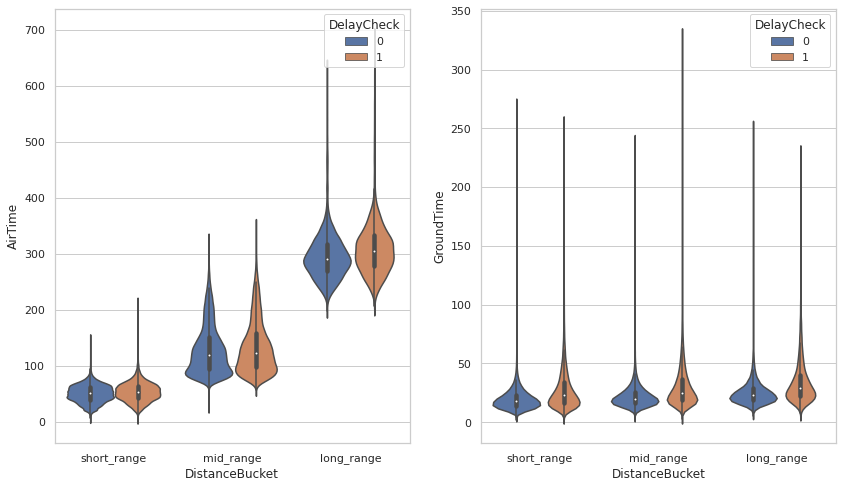

In [ ]:
import seaborn as sns
sns.set(style = 'whitegrid')
plt.figure(figsize=((14,8)))
plt.subplot(1,2,1)
sns.violinplot(x = df_sub.DistanceBucket,
            y = df_sub.AirTime, hue = df_sub.DelayCheck )
plt.subplot(1,2,2)
sns.violinplot(x = df_sub.DistanceBucket,
            y = df_sub.GroundTime, hue = df_sub.DelayCheck)

In [ ]:
plt.subplot(1,2,1)

sns.jointplot(x='Distance', y='AirTime', data = df_sub)


plt.subplot(1,2,2)
plt.bar(df_sub.SeasonalBucket,df_sub.TotalDelay.mean())
sns.set_style('whitegrid')
#plt.xlabel('Distance travelled by flight')
plt.plot()
plt.show()

In [ ]:
plt.bar(df_sub.SeasonalBucket,df_sub.TotalDelay.mean())
plt.show()

In [ ]:
plt.bar(df_sub.TotalDelayBucket,df_sub.FlightUsage.mean)
#plt.plot(df_sub.FlightUsage, df_sub.AirTime, 'g.-')
plt.show()

In [ ]:
df_sub.info()

In [ ]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 100000

#df_sub = df_sub.sort_values(['CityTrafficBucket','TotalDelay'], ascending=[True, True])
x1 = df_sub['CityTrafficBucket']
#y11 = sum(df_sub['AirTime'])/len(df_sub['AirTime'])
#y12 = sum(df_sub['TotalDelay'])/len(df_sub['TotalDelay'])
#y13 = sum(df_sub['GroundTime'])/len(df_sub['GroundTime'])
y11 = df_sub['AirTime']
y12 = df_sub['TotalDelay']
y13 = df_sub['GroundTime']


x2 = df_sub['SeasonalBucket']
y21 = df_sub['TotalDelay']
y22 = df_sub['GroundTime']

x3 = df_sub['FlightUsage']
y31 = df_sub['TotalDelay']
y32 = df_sub['AirTime']

x4 = df_sub['GroundTime']
y4 = df_sub['TotalDelay']


plt.subplot(2,2,1)
plt.figure(figsize=((10,8)))
plt.plot([], [], label="TotalDelay",color='r')
plt.plot([], [], label = 'Airtime',color='b')
plt.plot([], [], label="GroundTime",color='g')
plt.stackplot(x1, y11, y12, y13, colors= ['r', 'g', 'b'])
plt.plot()
plt.xlabel('CityTrafficBucket')
plt.ylabel('Mean AirTime')
plt.title("City air traffic ")
plt.legend()
plt.show()



In [ ]:
y11 = df_sub['AirTime']
print

In [ ]:
#plt.subplot(2,2,2)
plt.figure(figsize=((10,8)))
plt.scatter([], [], label="Mean TotalDelay")
plt.scatter([], [], label="Mean GroundTime")
plt.stackplot(x2, y21, y22, colors= ['r', 'g'])
plt.plot()
plt.xlabel('SeasonalBucket')
plt.ylabel('Mean AirTime')
plt.title("City air traffic vs Airtime")
plt.legend()
plt.show()

'''
#plt.subplot(2,2,3)
plt.figure(figsize=((10,8)))
plt.scatter(x3, y31, label="TotalDelay")
plt.scatter(x3, y32, label="AirTime")
plt.plot()
plt.xlabel('SeasonalBucket')
plt.ylabel('Mean AirTime')
plt.title("City air traffic vs Airtime")
plt.legend()
plt.show()
'''

In [ ]:
df_sub['TotalDelay'].mean()

In [ ]:
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.legend()
plt.show()

####7.Normalizing the variables
StateAirportCount, FlightUsage, CityTrafficFreq can be normalized based on min_max scaling as they are used for modelling

In [ ]:
df_model = df_sub.copy()
# copy the data
print(df_sub.shape)

# apply normalization techniques by Column 1
#def normalize(df_z_scaled,colum):
def normalize(df_min_max_scaled,column):
  df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].mean()) / df_min_max_scaled[column].std()
  df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max()-df_min_max_scaled[column].min())
  #df_z_scaled = df.copy()

  #med = df_z_scaled[colum].median()

  #df_z_scaled[colum] = (df_z_scaled[colum] - med) / (df_z_scaled[colum].quantile(.75)-df_z_scaled[colum].quantile(.25))

  #return df_z_scaled
  return df_min_max_scaled

df_model = normalize(df_model,'StateAirportCount')
df_model = normalize(df_model,'FlightUsage')
df_model = normalize(df_model,'CityTrafficFreq')
df_model = normalize(df_model,'GroundTime')
df_model = normalize(df_model,'AirTime')
# = normalize(df_model,'TotalDelay')



df_model.rename(columns={'StateAirportCount':'NStateAirportCount','FlightUsage':'NFlightUsage','CityTrafficFreq':'NCityTrafficFreq',
                         'GroundTime':'NGroundTime', 'AirTime':'NAirTime', 'TotalDelay':'NTotalDelay'}, inplace=True)




df_model




(676652, 61)


,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,ReportingAirline,TailNumber,FlightNumberReportingAirline,OriginAirportID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateName,OriginWac,DestAirportID,DestCityMarketID,Dest,DestCityName,DestState,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,NAirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,NTotalDelay,NGroundTime,DelayCheck,NCityTrafficFreq,CityTrafficBucket,NStateAirportCount,NFlightUsage,TotalDelayBucket,YearlyBucket,DistanceBucket
0,0,2003,4,11,21,5,21/11/03,UA,N308UA,674,13930,30977,ORD,"Chicago, IL",IL,Illinois,41,12953,31703,LGA,"New York, NY",NY,New York,22,900.0,855.0,-5.0,-1.0,0900-0959,14.0,909.0,1148.0,2.0,1206.0,1150.0,-16.0,-2.0,1200-1259,0.0,0,0.0,126.0,115.0,0.143066,733.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042553,0,1.000000,VeryHighTraffic,0.214286,0.000000,0,Y1,mid_range
2,2,2002,2,5,2,4,02/05/02,DL,N325DL,2408,12339,32337,IND,"Indianapolis, IN",IN,Indiana,42,13204,31454,MCO,"Orlando, FL",FL,Florida,33,1300.0,1259.0,-1.0,-1.0,1300-1359,14.0,1313.0,1611.0,8.0,1613.0,1619.0,6.0,0.0,1600-1659,0.0,0,0.0,133.0,140.0,0.170803,828.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060790,0,0.088476,LowTraffic,0.107143,0.000000,0,Y1,mid_range
3,3,2004,4,12,21,2,21/12/04,WN,N691WN,1111,10423,30423,AUS,"Austin, TX",TX,Texas,74,11540,30615,ELP,"El Paso, TX",TX,Texas,74,1150.0,1150.0,0.0,0.0,1100-1159,10.0,1200.0,1220.0,5.0,1225.0,1225.0,0.0,0.0,1200-1259,0.0,0,0.0,95.0,95.0,0.115328,528.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.039514,0,0.108983,LowTraffic,0.857143,0.000000,0,Y1,mid_range
4,4,2003,2,6,6,5,06/06/03,DH,N706BR,7659,13029,33029,LNK,"Lincoln, NE",NE,Nebraska,65,13930,30977,ORD,"Chicago, IL",IL,Illinois,41,1330.0,1330.0,0.0,0.0,1300-1359,3.0,1333.0,1444.0,35.0,1455.0,1519.0,24.0,1.0,1400-1459,0.0,0,0.0,85.0,109.0,0.102190,466.0,2.0,0.0,0.0,24.0,0.0,0.0,24.0,0.109422,1,0.006540,LowTraffic,0.071429,0.000000,2,Y1,short_range
5,5,2001,4,10,11,4,11/10/01,WN,N513@@,378,14107,30466,PHX,"Phoenix, AZ",AZ,Arizona,81,13796,32457,OAK,"Oakland, CA",CA,California,91,650.0,650.0,0.0,0.0,0600-0659,15.0,705.0,847.0,3.0,850.0,850.0,0.0,0.0,0800-0859,0.0,0,0.0,120.0,120.0,0.147445,646.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.048632,0,0.448498,HighTraffic,0.107143,0.000000,0,Y1,mid_range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691081,186119,2008,1,2,18,1,18/02/08,WN,N216WR,628,11697,32467,FLL,"Fort Lauderdale, FL",FL,Florida,33,15304,33195,TPA,"Tampa, FL",FL,Florida,33,1420.0,1435.0,15.0,1.0,1400-1459,25.0,1500.0,1536.0,4.0,1520.0,1540.0,20.0,1.0,1500-1559,0.0,0,0.0,60.0,65.0,0.051095,197.0,1.0,0.0,0.0,5.0,0.0,15.0,20.0,0.082067,1,0.157799,ModerateTraffic,0.678571,0.021102,2,Y2,short_range
691082,186120,2007,4,11,7,3,07/11/07,WN,N278WN,111,13796,32457,OAK,"Oakland, CA",CA,California,91,13891,32575,ONT,"Ontario, CA",CA,California,91,1115.0,1135.0,20.0,1.0,1100-1159,11.0,1146.0,1244.0,3.0,1225.0,1247.0,22.0,1.0,1200-1259,0.0,0,0.0,70.0,72.0,0.083212,362.0,2.0,0.0,0.0,2.0,0.0,20.0,22.0,0.036474,1,0.142757,ModerateTraffic,1.000000,0.029318,2,Y2,short_range
691083,186121,2006,2,4,20,4,20/04/06,YV,N27314,6168,14698,34236,SBP,"San Luis Obispo, CA",CA,California,91,14107,30466,PHX,"Phoenix, AZ",AZ,Arizona,81,1226.0,1223.0,-3.0,-1.0,1200-1259,7.0,1230.0,1343.0,8.0,1402.0,1351.0,-11.0,-1.0,1400-1459,0.0,0,0.0,96.0,88.0,0.105109,509.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.039514,0,0.011305,LowTraffic,1.000000,0.016246,0,Y2,mid_range
691084,186122,2010,1,1,13,3,13/01/10,MQ,N719MQ,4629,14492,34492,RDU,"Raleigh/Durham, NC",NC,North Carolina,36,11278,30852,DCA,"Washington

In [ ]:
df_model.describe().transpose()

####8.OneHotEncoding for Seasons

In [ ]:
#df_model1 = df_model[['NTotalDelay','NAirTime','NGroundTime','NCityTrafficFreq','NStateAirportCount','NFlightUsage','DelayCheck']]
#print(df_model1)
# , 'DayOfWeek', 'CityTrafficBucket', 'DistanceBucket'
def OneHotEncoding(df_model,strin,list1):
  label_encoder = LabelEncoder()
  integer_encoded = label_encoder.fit_transform(df_model[strin])
  print(integer_encoded)

  # binary encode
  onehot_encoder = OneHotEncoder(sparse=False)
  integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
  onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
  print(onehot_encoded)


  df_ohe = pd.DataFrame(onehot_encoded, columns=list1)
  df_model = pd.concat([df_ohe,df_model], axis=1, join='inner')
  return df_model

listyear=['Y1','Y2','Y3','Y4']
df_model1 = OneHotEncoding(df_model,'YearlyBucket',listyear)
listweek=['W1','W2','W3','W4','W5','W6','W7']
df_model1 = OneHotEncoding(df_model1,'DayOfWeek', listweek)

df_model1.tail(5)


[0 0 0 ... 1 2 2]
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
[4 3 1 ... 0 5 4]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


,W1,W2,W3,W4,W5,W6,W7,Y1,Y2,Y3,Y4,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,ReportingAirline,TailNumber,FlightNumberReportingAirline,OriginAirportID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateName,OriginWac,DestAirportID,DestCityMarketID,Dest,DestCityName,DestState,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,NAirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,NTotalDelay,NGroundTime,DelayCheck,NCityTrafficFreq,CityTrafficBucket,NStateAirportCount,NFlightUsage,TotalDelayBucket,YearlyBucket,DistanceBucket
662539,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,157577,2007,4,10,20,6,20/10/07,DL,N961DL,1671,14122,30198,PIT,"Pittsburgh, PA",PA,Pennsylvania,23,10397,30397,ATL,"Atlanta, GA",GA,Georgia,34,1331.0,1347.0,16.0,1.0,1300-1359,9.0,1356.0,1515.0,10.0,1516.0,1525.0,9.0,0.0,1500-1559,0.0,0,0.0,105.0,98.0,0.113869,526.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.051672,0,0.111015,LowTraffic,0.250000,0.030065,0,Y2,mid_range
662540,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,157578,2010,3,9,13,1,13/09/10,OO,N455SW,4680,14869,34614,SLC,"Salt Lake City, UT",UT,Utah,87,11603,31603,EUG,"Eugene, OR",OR,Oregon,92,1127.0,1126.0,-1.0,-1.0,1100-1159,18.0,1144.0,1214.0,4.0,1222.0,1218.0,-4.0,-1.0,1200-1259,0.0,0,0.0,115.0,112.0,0.129927,619.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060790,0,0.302027,HighTraffic,0.142857,0.033240,0,Y3,mid_range
662541,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,157579,2009,1,1,16,5,16/01/09,WN,N285WN,1506,14100,34100,PHL,"Philadelphia, PA",PA,Pennsylvania,23,14492,34492,RDU,"Raleigh/Durham, NC",NC,North Carolina,36,610.0,606.0,-4.0,-1.0,0600-0659,10.0,616.0,730.0,2.0,750.0,732.0,-18.0,-2.0,0700-0759,0.0,0,0.0,100.0,86.0,0.106569,336.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030395,0,0.232751,ModerateTraffic,0.250000,0.020542,0,Y3,short_range
662542,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,157580,2010,4,10,18,1,18/10/10,AS,N614AS,633,14107,30466,PHX,"Phoenix, AZ",AZ,Arizona,81,14747,30559,SEA,"Seattle, WA",WA,Washington,93,1410.0,1407.0,-3.0,-1.0,1400-1459,17.0,1424.0,1701.0,4.0,1707.0,1705.0,-2.0,-1.0,1700-1759,0.0,0,0.0,177.0,178.0,0.227737,1107.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057751,0,0.448498,HighTraffic,0.107143,0.029132,0,Y3,mid_range
662543,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,157581,2009,3,8,16,7,16/08/09,AS,N581AS,110,10299,30299,ANC,"Anchorage, AK",AK,Alaska,1,14747,30559,SEA,"Seattle, WA",WA,Washington,93,100.0,54.0,-6.0,-1.0,0001-0559,24.0,118.0,508.0,5.0,520.0,513.0,-7.0,-1.0,0001-0559,0.0,0,0.0,200.0,199.0,0.246715,1449.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.082067,0,0.046854,LowTraffic,0.678571,0.014192,0,Y3,mid_range


In [ ]:
df_model1.shape

(648743, 72)

In [ ]:
sns.heatmap(df_model.corr())

####9.Neural Networks

For predicting if a flight gets delayed or not

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
from statsmodels.api import OLS
import statsmodels.api as sm

In [ ]:
X = df_model1[['W1','W2','W3','W4','W5','W6','W7','Y1','Y2','Y3','Y4','NAirTime', 'NGroundTime','NCityTrafficFreq','NFlightUsage']].values
Y = df_model1[['DelayCheck']]

#'NGroundTime' is depndent on certain local conditions. It cannot be predicted before the flight.
#X = X.values.reshape(-1,1)
#Y = Y.values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 12)
#x_train, x_vld, y_train, y_vld = train_test_split(x,y,test_size = 0.25,random_state = 12)

print(x_train.shape)
y_test.shape

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import LeakyReLU

In [ ]:
model = keras.Sequential(
    [
     keras.Input(shape=(15)),
     layers.Dense(256,activation='relu', use_bias=True),
     #layers.Dense(512, activation='sigmoid'),
     layers.Dense(1),
    ]
)

'''
#for layer by layer analysis
model = keras.Sequential()
model.add(keras.Input(shape=(28*28)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.summary()
model.add(layers.Dense(10))
'''


print(model.summary()) #gives info about the network

#from_logits - it uses softmax function and then uses crossentropy
#If there is no 'sparse' in cross entropy, then it is for one-hot encodings

model.add(LeakyReLU(alpha=0.1))
keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics=['accuracy'])

#Verbose - means prints after each epoch
#accuracy on training and test sets are displayed
history = model.fit(x_train, y_train, batch_size=64, validation_split= 0.25, epochs=5, verbose=2)
#history2 = model.fit(x_test, y_test, batch_size=32,epochs=20, verbose=2)

model.evaluate(x_test, y_test, batch_size=32,verbose=2)
#history = model.fit(X_train_scalled, y_train, validation_split=0.2, epochs=100)





In [ ]:
model.weights

In [ ]:
test_predictions = model.predict(x_test)

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values of delay')
plt.ylabel('Predictions of delay')
lims = [-2, 2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:

loss = history.history['loss']
val_loss = history.history['val_loss']
#test_loss = history2.history['loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r.-', label='Validation loss')
#plt.plot(epochs, test_loss, 'g.-', label='Test loss')
plt.title('Training, Validation and Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

'''
loss = history2.history2['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
'''

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs,acc, 'y', label='Training MSE')
plt.plot(epochs, val_acc, 'r', label='Validaton Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np



#X = dataset.iloc[:, 1:-1].values
#y = dataset.iloc[:, -1].values
X = df_model1[['W1','W2','W3','W4','W5','W6','W7','Y1','Y2','Y3','Y4','NAirTime', 'NGroundTime','NCityTrafficFreq','NFlightUsage']].values
y = df_model1[['DelayCheck']].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 12)

# Training the Decision Tree Regression model on the whole dataset
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Decision tree image
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
from sklearn.metrics import classification_report
y_pred = dt.predict(x_test)
#testing = np.array(y_test).argmax(axis=1)
#predictions = np.array(y_pred).argmax(axis=1)
#confusion_matrix(testing, predictions)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84    133033
           1       0.28      0.31      0.30     29153

    accuracy                           0.73    162186
   macro avg       0.56      0.57      0.57    162186
weighted avg       0.74      0.73      0.74    162186

[[109839  23194]
 [ 20023   9130]]


For predicting the delay time of a flight

In [ ]:
len()

In [ ]:
df_model1 = df_sub.copy()
# copy the data
print(df_sub.shape)

# apply normalization techniques by Column 1
#def normalize(df_z_scaled,colum):
def normalize(df_min_max_scaled,column):
  #df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].mean()) / df_min_max_scaled[column].std()
  df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max()-df_min_max_scaled[column].min())
  #df_z_scaled = df.copy()

  #med = df_z_scaled[colum].median()

  #df_z_scaled[colum] = (df_z_scaled[colum] - med) / (df_z_scaled[colum].quantile(.75)-df_z_scaled[colum].quantile(.25))

  #return df_z_scaled
  return df_min_max_scaled

df_model = normalize(df_model1,'StateAirportCount')
df_model = normalize(df_model1,'FlightUsage')
df_model = normalize(df_model1,'CityTrafficFreq')
df_model = normalize(df_model1,'GroundTime')
df_model = normalize(df_model1,'AirTime')
df_model = normalize(df_model1,'TotalDelay')



df_model1.rename(columns={'StateAirportCount':'NStateAirportCount','FlightUsage':'NFlightUsage','CityTrafficFreq':'NCityTrafficFreq',
                         'GroundTime':'NGroundTime', 'AirTime':'NAirTime', 'TotalDelay':'NTotalDelay'}, inplace=True)




df_model1



In [ ]:
#dfmodel1 = df_model1[df_model['NTotalDelay']>0]
X = df_model1[['NAirTime', 'NStateAirportCount','NCityTrafficFreq','NFlightUsage']].values
Y = df_model1[['NTotalDelay']]

#'NGroundTime' is depndent on certain local conditions. It cannot be predicted before the flight.
#X = X.values.reshape(-1,1)
#Y = Y.values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 3)


In [ ]:
'''
model = keras.Sequential(
    [
     keras.Input(shape=(5)),
     layers.Dense(256, activation='relu'),
     #layers.Dense(512, activation='relu'),
     layers.Dense(1),
    ]
)

'''
#for layer by layer analysis
model = keras.Sequential()
model.add(keras.Input(shape=(4)))
#model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256))
#model.add(LeakyReLU(alpha=0.05))
#model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.25))
tf.keras.layers.PReLU(
    alpha_initializer=None,
    alpha_regularizer=None,
    alpha_constraint=None)

#print(model.summary()) #gives info about the network

#from_logits - it uses softmax function and then uses crossentropy
#If there is no 'sparse' in cross entropy, then it is for one-hot encodings
#model.add(LeakyReLU(alpha=0.1))
#keras.optimizers.Adam(learning_rate=0.1)
#model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics=['accuracy'])

model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

#Verbose - means prints after each epoch
#accuracy on training and test sets are displayed
history = model.fit(x_train, y_train, batch_size=64, validation_split= 0.25, epochs=5, verbose=2)
#model.fit(x_test, y_test, batch_size=32,epochs = 5, verbose=2)
model.evaluate(x_test, y_test, verbose = 2)

#history = model.fit(X_train_scalled, y_train, validation_split=0.2, epochs=100)


In [ ]:
layerCount = len(model.layers)
lastLayer = layerCount - 1;
hiddenLayer = layerCount -2;

#getting the weights:
hiddenWeights = model.layers[hiddenLayer].get_weights()
lastWeights = model.layers[lastLayer].get_weights()
hiddenWeights

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
#test_loss = history2.hist['loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
#plt.plot(epochs, test_loss, 'g.-', label='Test loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

'''
loss = history2.history2['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
'''

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs,acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validaton Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:

# link - https://www.pyimagesearch.com/2019/01/21/regression-with-keras/
# one-hot encode the zip code categorical data (by definition of
# one-hot encoing, all output features are now in the range [0, 1])
zipBinarizer = LabelBinarizer().fit(df["zipcode"])
trainCategorical = zipBinarizer.transform(train["zipcode"])
testCategorical = zipBinarizer.transform(test["zipcode"])
# construct our training and testing data points by concatenating
# the categorical features with the continuous features
trainX = np.hstack([trainCategorical, trainContinuous])
testX = np.hstack([testCategorical, testContinuous])
# return the concatenated training and testing data
return (trainX, testX)
#First, we’ll one-hot encode the zip codes (Lines 47-49).

# one-hot encode the zip code categorical data (by definition of
# one-hot encoing, all output features are now in the range [0, 1])
zipBinarizer = LabelBinarizer().fit(df["zipcode"])
trainCategorical = zipBinarizer.transform(train["zipcode"])
testCategorical = zipBinarizer.transform(test["zipcode"])
# construct our training and testing data points by concatenating
# the categorical features with the continuous features
trainX = np.hstack([trainCategorical, trainContinuous])
testX = np.hstack([testCategorical, testContinuous])
# return the concatenated training and testing data
return (trainX, testX)

# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
def create_mlp(dim, regress=False):
	# define our MLP network
	model = Sequential()
	model.add(Dense(8, input_dim=dim, activation="relu"))
	model.add(Dense(4, activation="relu"))
	# check to see if the regression node should be added
	if regress:
		model.add(Dense(1, activation="linear"))
	# return our model
	return model


####10.Multilinear Regression Model

In [ ]:
def multi_lin_reg_model(df,k):
    X = df[['NAirTime','NGroundTime','NCityTrafficFreq','NStateAirportCount','NFlightUsage']].values
    Y = df[['NTotalDelay']]

    #X = X.values.reshape(-1,1)
    #Y = Y.values.reshape(-1,1)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = k)

    MLR = LinearRegression()
    MLR.fit(X_train, Y_train)

    Y_pred = MLR.predict(X_test)
    Y_train_pred = MLR.predict(X_train)

    matrix = np.concatenate((X_test.reshape(len(Y_test),5), Y_pred.reshape(len(Y_pred),1)),axis = 1)

    print("Coefficients of NAirTime','NGroundTime','NCityTrafficFreq','NStateAirportCount','NFlightUsage are respectively \n", MLR.coef_)
    print("\nIntercept is\n ", MLR.intercept_)

    corr = np.corrcoef(X_test, Y_pred, rowvar=False)
    cor_pm = np.corrcoef(Y_test , Y_pred, rowvar=False)
    print(" \nVariables correlation is\n", corr)
    print("\nobserved vs predicted correlation of TotalDelay is\n", cor_pm)

    matrix_df = pd.DataFrame(matrix, columns=['NAirTime','NGroundTime','NCityTrafficFreq','NStateAirportCount','NFlightUsage', 'TotalDelay'])
    pd.plotting.scatter_matrix(matrix_df, figsize=(10, 10))
    print("\ncorrelation plot for training set")
    plt.show()



    print("METHOD 2")
    #X_ = sm.add_constant(X_train)
    #model1 = sm.OLS(Y_train, X_).fit()
    Y_ = sm.add_constant(Y_pred)
    model2 = sm.OLS(Y_test, Y_).fit()

    #print("model1 - training set summary")
    #model1.summary()

    print("model2 - testing set summary")
    #print(model2.summary())

    #fig = plt.figure(figsize=(12,8))
    #fig = sm.graphics.plot_partregress_grid(model2, fig=fig)

    fig = plt.figure(figsize=(8, 8))
    fig = sm.graphics.plot_ccpr_grid(model2, fig=fig)

    res = MLR.predict([[100,20,20,3,50]])
    print("\n\nThe expected delay is", res,"mins\n\n")

    return MLR.coef_, MLR.intercept_, cor_pm, model2.summary(),res

In [ ]:
result =multi_lin_reg_model(df_model1, 42)

####12.Polynomial Regression

In [ ]:
# Importing the dataset
def Poly_reg_model(df):
    #X = df[['NAirTime','NGroundTime','NCityTrafficFreq','NStateAirportCount','NFlightUsage']].values
    y = df[['NTotalDelay']]
    X = df[['NGroundTime']].values

    # Training the Linear Regression model on the whole dataset
    from sklearn.linear_model import LinearRegression
    lin_reg = LinearRegression()
    lin_reg.fit(X, y)

    # Training the Polynomial Regression model on the whole dataset
    from sklearn.preprocessing import PolynomialFeatures
    poly_reg = PolynomialFeatures(3)
    X_poly = poly_reg.fit_transform(X)
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(X_poly, y)

    # Visualising the Linear Regression results
    plt.scatter(X, y, color = 'red')
    plt.plot(X, lin_reg.predict(X), color = 'blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position Level')
    plt.ylabel('Salary')
    plt.show()

    # Visualising the Polynomial Regression results
    plt.scatter(X, y, color = 'red')
    plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
    plt.title('Truth or Bluff (Polynomial Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()

    # Visualising the Polynomial Regression results (for higher resolution and smoother curve)
    X_grid = np.arange(min(X), max(X), 0.1)
    X_grid = X_grid.reshape((len(X_grid), 1))
    plt.scatter(X, y, color = 'red')
    plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
    plt.title('Truth or Bluff (Polynomial Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()

    return  lin_reg_2.predict(poly_reg.fit_transform([[0.7]]))

    # Predicting a new result with Linear Regression


    # Predicting a new result with Polynomial Regression


In [ ]:
#model.weights
def plot_model(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()
x = tf.linspace(0.0, 5, 6)
y = model.predict(x_test)
plot_model(x, y)

In [ ]:
Poly_reg_model(df_model1)

In [ ]:
lin_reg_2.predict( lin_reg_2.predict([[100,20,20,3,50]]),